In [2]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\visha\\Desktop\\vs code\\big mart/Train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
import pandas as pd

# Calculate the frequency of each product
product_frequency = data['Item_Identifier'].value_counts()

# Add a frequency column to the original dataset
data['Product_Frequency'] = data['Item_Identifier'].map(product_frequency)

# Calculate average sales for each product frequency
avg_sales_by_frequency = data.groupby('Product_Frequency')['Item_Outlet_Sales'].mean().reset_index()

# Display the result to the user
print("Average Sales by Product Frequency:")
print(avg_sales_by_frequency)


Average Sales by Product Frequency:
   Product_Frequency  Item_Outlet_Sales
0                  1        2068.418667
1                  2        2694.464066
2                  3        2170.777070
3                  4        2235.435593
4                  5        2204.740908
5                  6        2172.303168
6                  7        2079.483253
7                  8        2202.679002
8                  9        2471.819489
9                 10        1601.914800


In [5]:
from scipy.stats import linregress

# Perform linear regression to test the relationship between product frequency and sales
slope, intercept, r_value, p_value, std_err = linregress(avg_sales_by_frequency['Product_Frequency'], avg_sales_by_frequency['Item_Outlet_Sales'])

# Display the results of the statistical test
test_results = {
    'Slope': slope,
    'Intercept': intercept,
    'R-squared': r_value**2,
    'P-value': p_value,
    'Standard Error': std_err
}

test_results


{'Slope': np.float64(-36.95655717967024),
 'Intercept': np.float64(2393.464665892653),
 'R-squared': np.float64(0.15872942833879392),
 'P-value': np.float64(0.25413997725796716),
 'Standard Error': np.float64(30.08054047417328)}

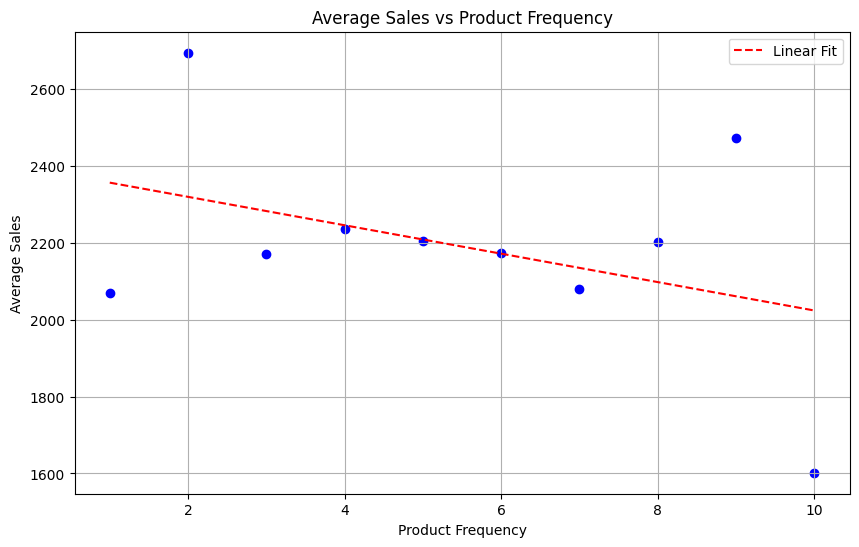

In [6]:
import matplotlib.pyplot as plt

# Plotting sales against product frequency
plt.figure(figsize=(10, 6))
plt.scatter(avg_sales_by_frequency['Product_Frequency'], avg_sales_by_frequency['Item_Outlet_Sales'], color='blue')
plt.plot(avg_sales_by_frequency['Product_Frequency'], intercept + slope * avg_sales_by_frequency['Product_Frequency'], color='red', linestyle='--', label='Linear Fit')

plt.xlabel('Product Frequency')
plt.ylabel('Average Sales')
plt.title('Average Sales vs Product Frequency')
plt.legend()
plt.grid(True)
plt.show()
